In [6]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater
from PIL import Image
img = Image.open('C:/Users/Bipasha Roy/IMAGE PROCESSING/brain.tif')
def ShowImage(img):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

In [7]:
plt.show()

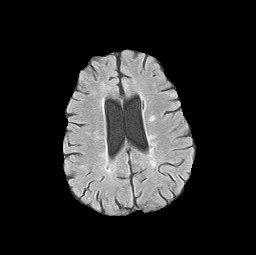

In [8]:
img

In [9]:
from PIL import Image
im = Image.open('C:/Users/Bipasha Roy/IMAGE PROCESSING/brain.tif')
im.save('test.jpeg')

In [10]:
#im = Image.open('C:/Users/Arnab Bhowmik/Desktop/test.jpeg')
#rgb_im = im.convert('RGB')
#r, g, b = rgb_im.getpixel((5, 5))

#print(r, g, b)
#(65, 100, 137)

In [11]:
#rgb_im

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/Bipasha Roy/IMAGE PROCESSING/test.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [13]:
gray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
ret, thresh

(86.0, array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [15]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [16]:
unknown

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
ret, sure_fg

(80.26883850097656, array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [18]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [19]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,1,1]

In [20]:
img

array([[[255,   1,   1],
        [255,   1,   1],
        [255,   1,   1],
        ...,
        [255,   1,   1],
        [255,   1,   1],
        [255,   1,   1]],

       [[255,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   1,   1]],

       [[255,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   1,   1]],

       ...,

       [[255,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   1,   1]],

       [[255,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   1,   1]],

       [[255,   1,   1],
        [255,   1,   1],
        [255,   1,   1],
        ...,
        [255,   1,   1],
        [255,   1,   1],
        [255,   1,   1]]

In [21]:
from numpy import array
from scipy.misc import toimage
imm=toimage(img)

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


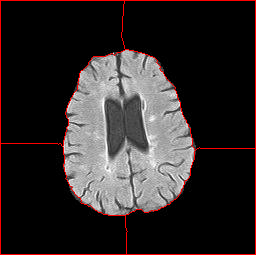

In [22]:
imm

In [23]:
imm1=toimage(markers)

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


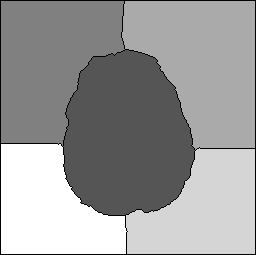

In [24]:
imm1

In [25]:
imm2=toimage(thresh)

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


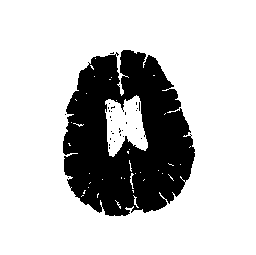

In [26]:
imm2

In [27]:
imm.save('C:/Users/Bipasha Roy/IMAGE PROCESSING/out1.png')
imm1.save('C:/Users/Bipasha Roy/IMAGE PROCESSING/out2.png')
imm2.save('C:/Users/Bipasha Roy/IMAGE PROCESSING/out3.png')

In [28]:
im.convert('1').show()

In [29]:
im.convert('L').show()

In [30]:
im.convert('RGB').show()

In [31]:
im.convert('L').show()